In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

<ipython-input-1-6076c5e9703b>:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### RFID data

#### Get paths for files to process

#### Clean df and combine into 1

In [2]:
paths = ['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.20.csv',
        '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.24.csv',
        '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.27.csv']

data_RFID = pd.DataFrame()

for path in paths:
    print(path)
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.drop([0,1,2,3,4,5,6,7,8])

    print(data_RFID_int.shape)
    
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    
    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['start_datetime_correct'] = [x.replace(year = 2020) - dt.timedelta(days = 2) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['date'] = data_RFID_int['start_datetime_correct'].dt.date 
    data_RFID_int['day'] = data_RFID_int['start_datetime_correct'].dt.day 
    data_RFID_int['start_time'] = [x.split(' ')[1] for x in data_RFID_int['start_datetime_correct'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['hour'] = data_RFID_int['start_datetime_correct'].dt.hour
    data_RFID_int['min'] = data_RFID_int['start_datetime_correct'].dt.minute

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.20.csv
(19976, 14)
(19975, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.24.csv
(13585, 14)
(33559, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.3m/Idspyder-20.11.27.csv
(60907, 14)
(94465, 21) 



,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min
9,44155.6401765162,041A555DFF,unknown,RFID3,4.447,NaN,NaN,25.0,NaN,NaN,NaN,"0,113,115,114,745,122,77,114,115,114,225,241,578,114,153,76,138,115,427,78,115,241,88,114,115",NaN,NaN,2090-11-22 15:21:51.250982400,2020-11-20 15:21:51.250982400,2020-11-20,20,15:21:51,15,21
10,44155.6401974769,041A55594C,unknown,RFID2,3.833,NaN,NaN,24.0,NaN,NaN,NaN,"0,327,102,115,154,75,130,399,113,116,144,85,125,119,116,98,851,78,114,145,84,115,113,115",NaN,NaN,2090-11-22 15:21:53.062012800,2020-11-20 15:21:53.062012800,2020-11-20,20,15:21:53,15,21
11,44155.6402670718,041A555768,unknown,RFID6,0.616,NaN,NaN,2.0,NaN,NaN,NaN,"0,616",NaN,NaN,2090-11-22 15:21:59.075020800,2020-11-20 15:21:59.075020800,2020-11-20,20,15:21:59,15,21
12,44155.6403704861,041A555A78,unknown,RFID2,13.198,NaN,NaN,103.0,NaN,NaN,NaN,"0,514,115,114,114,415,115,114,114,150,79,115,115,113,116,114,115,114,114,156,74,114,115,156,115,72,115,114,147,82,115,113,147,83,113,116,113,146,115,83,114,148,82,115,114,115,151,78,313,243,86,115,143,86,115,115,113,154,275,116,241,87,114,115,114,115,115,242,86,116,113,115,115,113,151,108,86,113,116,113,116,113,115,114,116,114,115,113,115,151,79,113,116,113,116,135,130,206,108,116,113,115,113",NaN,NaN,2090-11-22 15:22:08.009990400,2020-11-20 15:22:08.009990400,2020-11-20,20,15:22:08,15,22
13,44155.6404998032,041A555768,unknown,RFID5,5.315,NaN,NaN,30.0,NaN,NaN,NaN,"0,115,113,115,343,116,113,209,87,115,315,113,115,156,105,116,80,116,114,115,113,116,914,155,74,514,414,115,115,114",NaN,NaN,2090-11-22 15:22:19.182979200,2020-11-20 15:22:19.182979200,2020-11-20,20,15:22:19,15,22


#### Compute endtime 

In [3]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['end_datetime'] = data_RFID.apply(lambda row: add_duration(row['start_datetime_correct'], row['eventDuration']), axis=1)
data_RFID['end_time'] = [x.split(' ')[1] for x in data_RFID['end_datetime'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(94465, 23)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time
9,44155.6401765162,041A555DFF,unknown,RFID3,4.447,NaN,NaN,25.0,NaN,NaN,NaN,"0,113,115,114,745,122,77,114,115,114,225,241,578,114,153,76,138,115,427,78,115,241,88,114,115",NaN,NaN,2090-11-22 15:21:51.250982400,2020-11-20 15:21:51.250982400,2020-11-20,20,15:21:51,15,21,2020-11-20 15:21:55.697982400,15:21:55
10,44155.6401974769,041A55594C,unknown,RFID2,3.833,NaN,NaN,24.0,NaN,NaN,NaN,"0,327,102,115,154,75,130,399,113,116,144,85,125,119,116,98,851,78,114,145,84,115,113,115",NaN,NaN,2090-11-22 15:21:53.062012800,2020-11-20 15:21:53.062012800,2020-11-20,20,15:21:53,15,21,2020-11-20 15:21:56.895012800,15:21:56
11,44155.6402670718,041A555768,unknown,RFID6,0.616,NaN,NaN,2.0,NaN,NaN,NaN,"0,616",NaN,NaN,2090-11-22 15:21:59.075020800,2020-11-20 15:21:59.075020800,2020-11-20,20,15:21:59,15,21,2020-11-20 15:21:59.691020800,15:21:59
12,44155.6403704861,041A555A78,unknown,RFID2,13.198,NaN,NaN,103.0,NaN,NaN,NaN,"0,514,115,114,114,415,115,114,114,150,79,115,115,113,116,114,115,114,114,156,74,114,115,156,115,72,115,114,147,82,115,113,147,83,113,116,113,146,115,83,114,148,82,115,114,115,151,78,313,243,86,115,143,86,115,115,113,154,275,116,241,87,114,115,114,115,115,242,86,116,113,115,115,113,151,108,86,113,116,113,116,113,115,114,116,114,115,113,115,151,79,113,116,113,116,135,130,206,108,116,113,115,113",NaN,NaN,2090-11-22 15:22:08.009990400,2020-11-20 15:22:08.009990400,2020-11-20,20,15:22:08,15,22,2020-11-20 15:22:21.207990400,15:22:21
13,44155.6404998032,041A555768,unknown,RFID5,5.315,NaN,NaN,30.0,NaN,NaN,NaN,"0,115,113,115,343,116,113,209,87,115,315,113,115,156,105,116,80,116,114,115,113,116,914,155,74,514,414,115,115,114",NaN,NaN,2090-11-22 15:22:19.182979200,2020-11-20 15:22:19.182979200,2020-11-20,20,15:22:19,15,22,2020-11-20 15:22:24.497979200,15:22:24


#### Add light dark

In [4]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_RFID['ld_seg'] = data_RFID['hour'].apply(assign_ld)

print(data_RFID.shape)
data_RFID.head()

(94465, 24)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg
9,44155.6401765162,041A555DFF,unknown,RFID3,4.447,NaN,NaN,25.0,NaN,NaN,NaN,"0,113,115,114,745,122,77,114,115,114,225,241,578,114,153,76,138,115,427,78,115,241,88,114,115",NaN,NaN,2090-11-22 15:21:51.250982400,2020-11-20 15:21:51.250982400,2020-11-20,20,15:21:51,15,21,2020-11-20 15:21:55.697982400,15:21:55,light
10,44155.6401974769,041A55594C,unknown,RFID2,3.833,NaN,NaN,24.0,NaN,NaN,NaN,"0,327,102,115,154,75,130,399,113,116,144,85,125,119,116,98,851,78,114,145,84,115,113,115",NaN,NaN,2090-11-22 15:21:53.062012800,2020-11-20 15:21:53.062012800,2020-11-20,20,15:21:53,15,21,2020-11-20 15:21:56.895012800,15:21:56,light
11,44155.6402670718,041A555768,unknown,RFID6,0.616,NaN,NaN,2.0,NaN,NaN,NaN,"0,616",NaN,NaN,2090-11-22 15:21:59.075020800,2020-11-20 15:21:59.075020800,2020-11-20,20,15:21:59,15,21,2020-11-20 15:21:59.691020800,15:21:59,light
12,44155.6403704861,041A555A78,unknown,RFID2,13.198,NaN,NaN,103.0,NaN,NaN,NaN,"0,514,115,114,114,415,115,114,114,150,79,115,115,113,116,114,115,114,114,156,74,114,115,156,115,72,115,114,147,82,115,113,147,83,113,116,113,146,115,83,114,148,82,115,114,115,151,78,313,243,86,115,143,86,115,115,113,154,275,116,241,87,114,115,114,115,115,242,86,116,113,115,115,113,151,108,86,113,116,113,116,113,115,114,116,114,115,113,115,151,79,113,116,113,116,135,130,206,108,116,113,115,113",NaN,NaN,2090-11-22 15:22:08.009990400,2020-11-20 15:22:08.009990400,2020-11-20,20,15:22:08,15,22,2020-11-20 15:22:21.207990400,15:22:21,light
13,44155.6404998032,041A555768,unknown,RFID5,5.315,NaN,NaN,30.0,NaN,NaN,NaN,"0,115,113,115,343,116,113,209,87,115,315,113,115,156,105,116,80,116,114,115,113,116,914,155,74,514,414,115,115,114",NaN,NaN,2090-11-22 15:22:19.182979200,2020-11-20 15:22:19.182979200,2020-11-20,20,15:22:19,15,22,2020-11-20 15:22:24.497979200,15:22:24,light


#### Map unitLabel and bottle contents

In [5]:
unitLabel_map = {'RFID1': 'RFID_10',
                 'RFID2': 'RFID_05',
                 'RFID3': 'RFID_20',
                 'RFID4': 'RFID_H20',
                 'RFID5': 'RFID_10',
                 'RFID6': 'RFID_05',
                 'RFID7': 'RFID_20',
                 'RFID8': 'RFID_H20'}

data_RFID['unitLabel_drink'] = data_RFID['unitLabel'].map(unitLabel_map)
print(data_RFID.shape)

(94465, 25)


#### Add metadata and clean

In [6]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_3m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(94465, 34)


,Round,Cage,Animal,Injury,Unique,IdRFID,weight_pre,weight_post,weight_diff,index,DateTime,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg,unitLabel_drink
0,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,12,44155.6403704861,unknown,RFID2,13.198,NaN,NaN,103.0,NaN,NaN,NaN,"0,514,115,114,114,415,115,114,114,150,79,115,115,113,116,114,115,114,114,156,74,114,115,156,115,72,115,114,147,82,115,113,147,83,113,116,113,146,115,83,114,148,82,115,114,115,151,78,313,243,86,115,143,86,115,115,113,154,275,116,241,87,114,115,114,115,115,242,86,116,113,115,115,113,151,108,86,113,116,113,116,113,115,114,116,114,115,113,115,151,79,113,116,113,116,135,130,206,108,116,113,115,113",NaN,NaN,2090-11-22 15:22:08.009990400,2020-11-20 15:22:08.009990400,2020-11-20,20,15:22:08,15,22,2020-11-20 15:22:21.207990400,15:22:21,light,RFID_05
1,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,15,44155.6406285995,unknown,RFID3,0.812,NaN,NaN,7.0,NaN,NaN,NaN,"0,114,115,114,243,125,101",NaN,NaN,2090-11-22 15:22:30.311040000,2020-11-20 15:22:30.311040000,2020-11-20,20,15:22:30,15,22,2020-11-20 15:22:31.123040000,15:22:31,light,RFID_20
2,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,25,44155.6415079514,unknown,RFID4,0.573,NaN,NaN,6.0,NaN,NaN,NaN,"0,115,115,114,114,115",NaN,NaN,2090-11-22 15:23:46.286966400,2020-11-20 15:23:46.286966400,2020-11-20,20,15:23:46,15,23,2020-11-20 15:23:46.859966400,15:23:46,light,RFID_H20
3,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,31,44155.6419952893,unknown,RFID4,0.229,NaN,NaN,3.0,NaN,NaN,NaN,"0,115,114",NaN,NaN,2090-11-22 15:24:28.392969600,2020-11-20 15:24:28.392969600,2020-11-20,20,15:24:28,15,24,2020-11-20 15:24:28.621969600,15:24:28,light,RFID_H20
4,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,35,44155.6425349653,unknown,RFID1,4.449,NaN,NaN,32.0,NaN,NaN,NaN,"0,114,115,142,214,124,78,114,150,813,119,76,147,82,150,79,115,242,116,85,115,114,155,74,115,114,115,114,115,114,144,85",NaN,NaN,2090-11-22 15:25:15.020976000,2020-11-20 15:25:15.020976000,2020-11-20,20,15:25:15,15,25,2020-11-20 15:25:19.469976000,15:25:19,light,RFID_10


#### Add day, hour, and min counts

In [7]:
#split by round to get specific dates
data_RFID_r1 = data_RFID_final[data_RFID_final['Round'] == 1]
data_RFID_r2 = data_RFID_final[data_RFID_final['Round'] == 2]

#column of running day count
dat_map = dict(zip(data_RFID_r1['date'].unique(), np.arange(1,len(data_RFID_r1['date'].unique())+1)))
data_RFID_r1['day_count'] = data_RFID_r1['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r1['hour_count'] = (data_RFID_r1['day_count']*24) + data_RFID_r1['hour'] - 24
data_RFID_r1['min_count'] = (data_RFID_r1['hour_count']*60) + data_RFID_r1['min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r2['date'].unique(), np.arange(1,len(data_RFID_r2['date'].unique())+1)))
data_RFID_r2['day_count'] = data_RFID_r2['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r2['hour_count'] = (data_RFID_r2['day_count']*24) + data_RFID_r2['hour'] - 24
data_RFID_r2['min_count'] = (data_RFID_r2['hour_count']*60) + data_RFID_r2['min'] - 60

#combine back together
data_RFID_final = pd.concat([data_RFID_r1, data_RFID_r2], axis=0)
print(data_RFID_final.shape)
data_RFID_final.head()

(94465, 37)


,Round,Cage,Animal,Injury,Unique,IdRFID,weight_pre,weight_post,weight_diff,index,DateTime,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg,unitLabel_drink,day_count,hour_count,min_count
0,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,12,44155.6403704861,unknown,RFID2,13.198,NaN,NaN,103.0,NaN,NaN,NaN,"0,514,115,114,114,415,115,114,114,150,79,115,115,113,116,114,115,114,114,156,74,114,115,156,115,72,115,114,147,82,115,113,147,83,113,116,113,146,115,83,114,148,82,115,114,115,151,78,313,243,86,115,143,86,115,115,113,154,275,116,241,87,114,115,114,115,115,242,86,116,113,115,115,113,151,108,86,113,116,113,116,113,115,114,116,114,115,113,115,151,79,113,116,113,116,135,130,206,108,116,113,115,113",NaN,NaN,2090-11-22 15:22:08.009990400,2020-11-20 15:22:08.009990400,2020-11-20,20,15:22:08,15,22,2020-11-20 15:22:21.207990400,15:22:21,light,RFID_05,1,15,862
1,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,15,44155.6406285995,unknown,RFID3,0.812,NaN,NaN,7.0,NaN,NaN,NaN,"0,114,115,114,243,125,101",NaN,NaN,2090-11-22 15:22:30.311040000,2020-11-20 15:22:30.311040000,2020-11-20,20,15:22:30,15,22,2020-11-20 15:22:31.123040000,15:22:31,light,RFID_20,1,15,862
2,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,25,44155.6415079514,unknown,RFID4,0.573,NaN,NaN,6.0,NaN,NaN,NaN,"0,115,115,114,114,115",NaN,NaN,2090-11-22 15:23:46.286966400,2020-11-20 15:23:46.286966400,2020-11-20,20,15:23:46,15,23,2020-11-20 15:23:46.859966400,15:23:46,light,RFID_H20,1,15,863
3,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,31,44155.6419952893,unknown,RFID4,0.229,NaN,NaN,3.0,NaN,NaN,NaN,"0,115,114",NaN,NaN,2090-11-22 15:24:28.392969600,2020-11-20 15:24:28.392969600,2020-11-20,20,15:24:28,15,24,2020-11-20 15:24:28.621969600,15:24:28,light,RFID_H20,1,15,864
4,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,35,44155.6425349653,unknown,RFID1,4.449,NaN,NaN,32.0,NaN,NaN,NaN,"0,114,115,142,214,124,78,114,150,813,119,76,147,82,150,79,115,242,116,85,115,114,155,74,115,114,115,114,115,114,144,85",NaN,NaN,2090-11-22 15:25:15.020976000,2020-11-20 15:25:15.020976000,2020-11-20,20,15:25:15,15,25,2020-11-20 15:25:19.469976000,15:25:19,light,RFID_10,1,15,865


In [8]:
data_RFID_final = data_RFID_final[['Round', 'Cage', 'Animal', 'Injury', 'Unique', 'IdRFID', 'weight_pre', 'weight_post', 'weight_diff',
                                   'unitLabel_drink', 'eventDuration', 
                                   'date', 'day', 'start_time', 'end_time', 'ld_seg', 'hour', 'min', 
                                   'day_count', 'hour_count', 'min_count']]

print(data_RFID_final.shape)
data_RFID_final.head()

(94465, 21)


,Round,Cage,Animal,Injury,Unique,IdRFID,weight_pre,weight_post,weight_diff,unitLabel_drink,eventDuration,date,day,start_time,end_time,ld_seg,hour,min,day_count,hour_count,min_count
0,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_05,13.198,2020-11-20,20,15:22:08,15:22:21,light,15,22,1,15,862
1,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_20,0.812,2020-11-20,20,15:22:30,15:22:31,light,15,22,1,15,862
2,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_H20,0.573,2020-11-20,20,15:23:46,15:23:46,light,15,23,1,15,863
3,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_H20,0.229,2020-11-20,20,15:24:28,15:24:28,light,15,24,1,15,864
4,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_10,4.449,2020-11-20,20,15:25:15,15:25:19,light,15,25,1,15,865


#### Viz

RFID_05


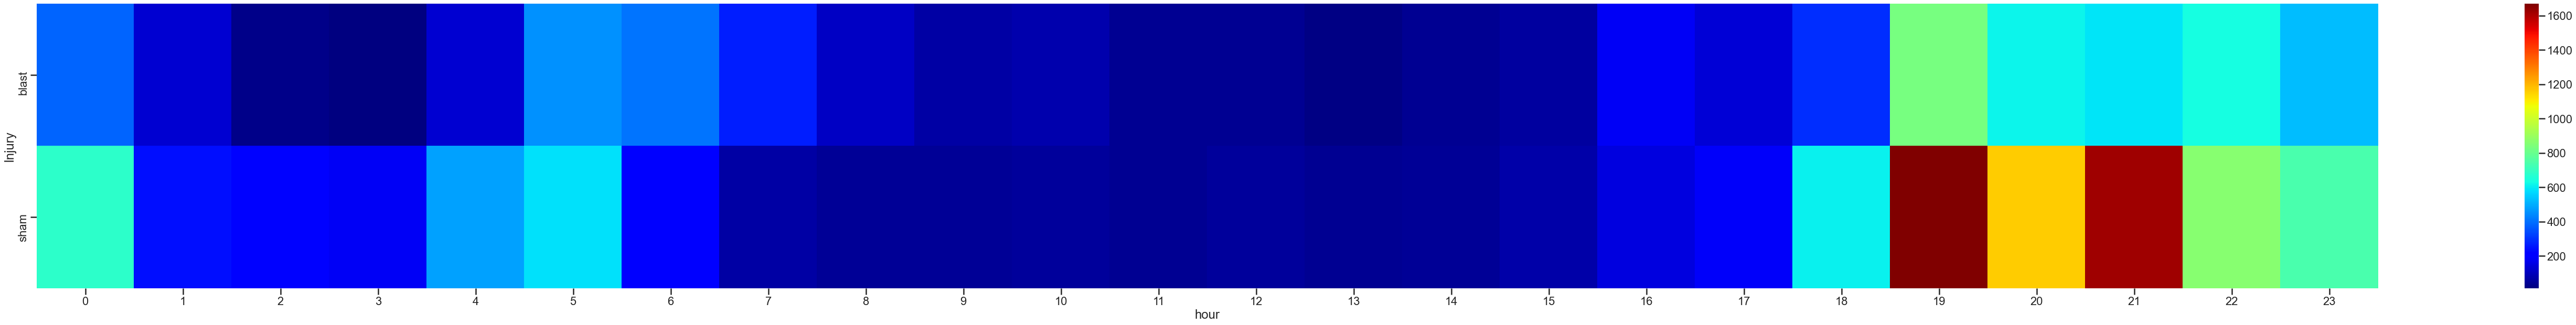

RFID_20


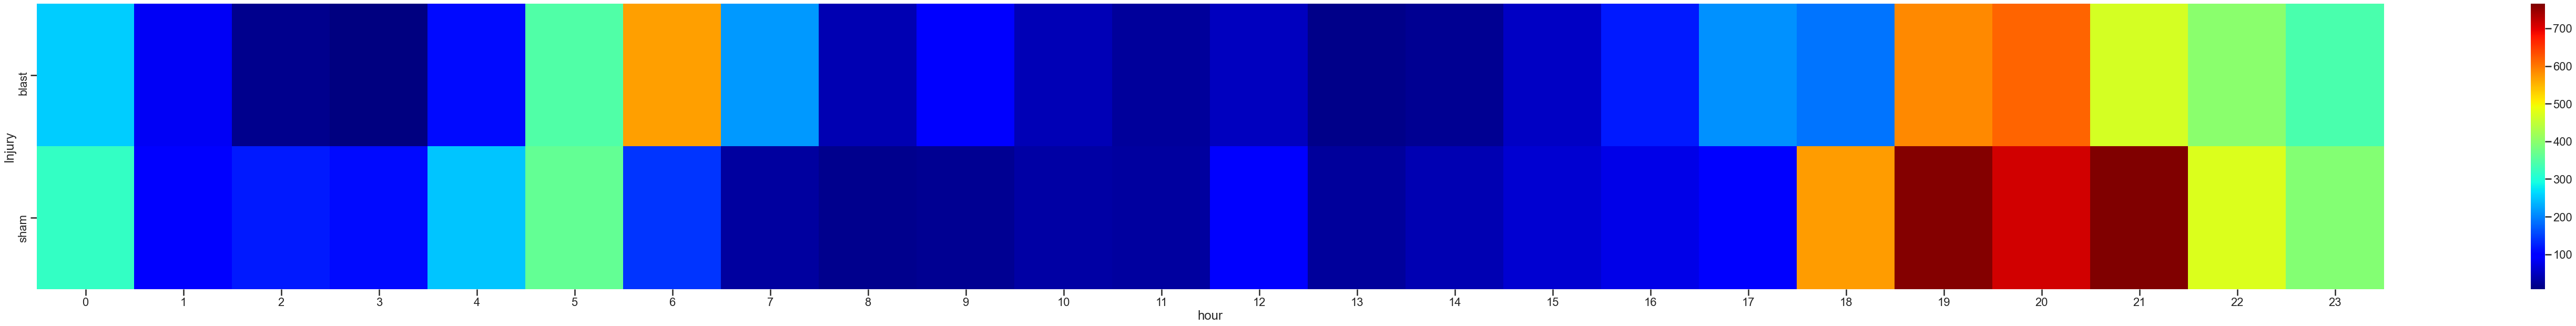

RFID_H20


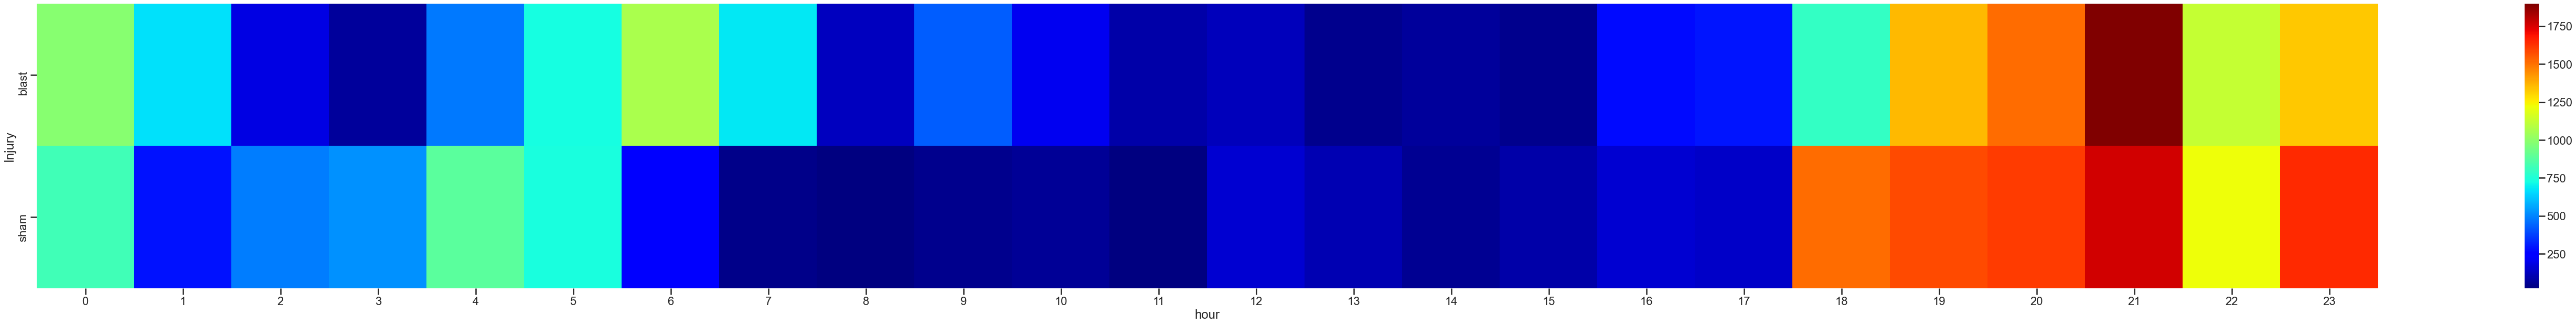

RFID_10


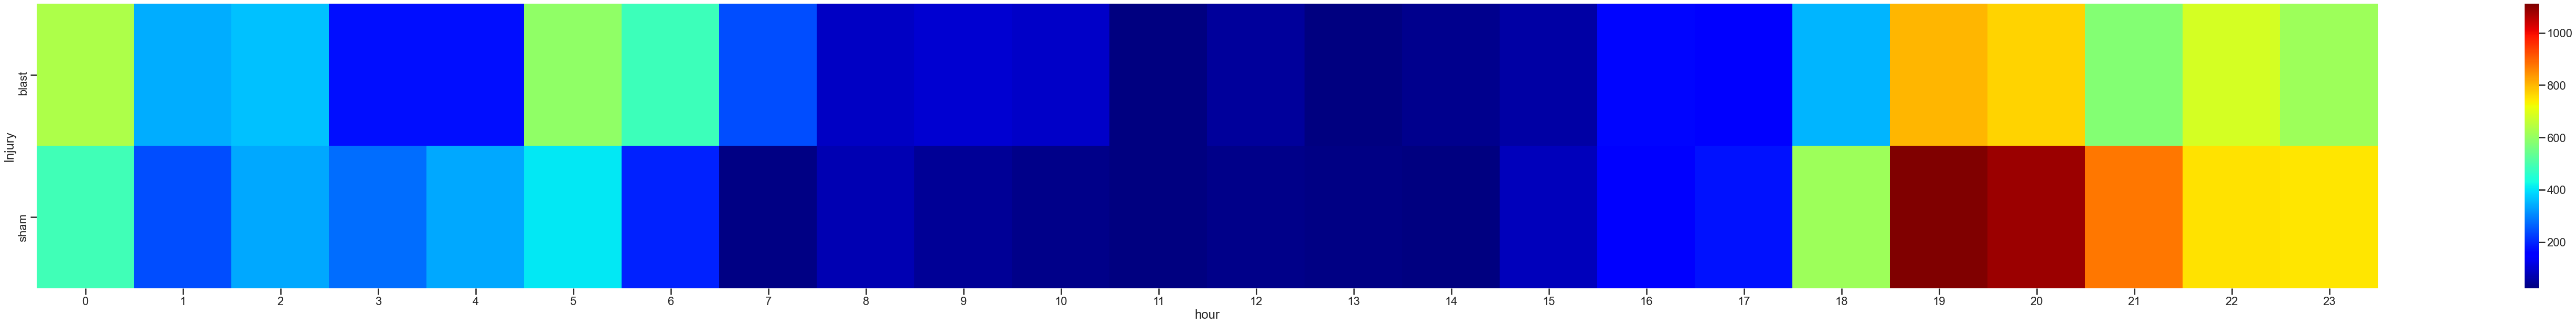

In [9]:
data_heat = data_RFID_final[(data_RFID_final['day_count'] < 8)]

for variable in data_heat['unitLabel_drink'].unique():
    print(variable)
    #select variable
    data_int = data_heat[data_heat['unitLabel_drink'] == variable]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['Injury', 'hour'])['eventDuration'].count().reset_index()
    #viz
    groupby = groupby.pivot("Injury", "hour", "eventDuration")
    plt.figure(figsize=(100,10))
    ax = sns.heatmap(groupby, cmap="jet")
    plt.show()

### VDM data

#### Clean df and combine into 1

In [10]:
paths = ['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.3m/201120.3m.csv',
        '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.3m/201127.3m.csv']

data_VDM = pd.DataFrame()

for path in paths:
    print(path)
    
    data_VDM_int = pd.read_csv(path)
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    print(data_VDM_int.shape)
    
    #add info from file name
    data_VDM_int['Cohort'] = path.split('/')[-2].split('.')[0]
    data_VDM_int['TP'] = path.split('/')[-2].split('.')[1]
    data_VDM_int['StartDate'] = path.split('/')[-1].split('.')[0]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')
    
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.3m/201120.3m.csv
(761949, 11)
(761949, 14) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.3m/201127.3m.csv
(1048557, 11)
(1810506, 14) 



,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml).1,Drinking Accum (ml).1,Drinking (ml).2,Drinking Accum (ml).2,Drinking (ml).3,Drinking Accum (ml).3,Cohort,TP,StartDate
0,0,1,11/20/20 15:22:31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,3m,201120
1,0,2,11/20/20 15:22:31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,3m,201120
2,1,1,11/20/20 15:22:33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,3m,201120
3,1,2,11/20/20 15:22:33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,3m,201120
4,2,1,11/20/20 15:22:34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,3m,201120


#### Clean up column names

In [11]:
data_VDM.columns = ['Int', 'Cage', 'Time', 
                    'VDM_10', 'VDM_1_accum',
                    'VDM_05', 'VDM_2_accum', 
                    'VDM_20', 'VDM_3_accum', 
                    'VDM_H20', 'VDM_4_accum',
                    'Cohort', 'TP', 'StartDate']

data_VDM = data_VDM[['Cage', 'Cohort', 'TP', 'StartDate', 'Time', 'VDM_10', 'VDM_05', 'VDM_20', 'VDM_H20']]

data_VDM.tail()

,Cage,Cohort,TP,StartDate,Time,VDM_10,VDM_05,VDM_20,VDM_H20
1048552,2,r1,3m,201127,12/7/20 8:16,0.0,0.0,0.0,0.0
1048553,1,r1,3m,201127,12/7/20 8:16,0.0,0.0,0.0,0.0
1048554,2,r1,3m,201127,12/7/20 8:16,0.0,0.0,0.0,0.0
1048555,1,r1,3m,201127,12/7/20 8:16,0.0,0.0,0.0,0.0
1048556,2,r1,3m,201127,12/7/20 8:16,0.0,0.0,0.0,0.0


#### Convert liquid vol to etoh vol

In [12]:
data_VDM['VDM_10_etoh'] = data_VDM['VDM_10']*.1
data_VDM['VDM_20_etoh'] = data_VDM['VDM_20']*.2
data_VDM['VDM_05_etoh'] = data_VDM['VDM_05']*.05

#### Make into tidy df

In [13]:
#melt dataframe (new column of parameters)

meta_params = ['Cage', 'Cohort', 'TP', 'StartDate', 'Time']
intake_params = ['VDM_10_etoh', 'VDM_05_etoh', 'VDM_20_etoh', 'VDM_H20']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(7242024, 7)


,Cage,Cohort,TP,StartDate,Time,variable,value
0,1,r1,3m,201120,11/20/20 15:22:31,VDM_10_etoh,0.0
1,2,r1,3m,201120,11/20/20 15:22:31,VDM_10_etoh,0.0
2,1,r1,3m,201120,11/20/20 15:22:33,VDM_10_etoh,0.0
3,2,r1,3m,201120,11/20/20 15:22:33,VDM_10_etoh,0.0
4,1,r1,3m,201120,11/20/20 15:22:34,VDM_10_etoh,0.0


#### Drop times with no intake data

In [14]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0]
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(14331, 7)


,Cage,Cohort,TP,StartDate,Time,variable,value
22658,1,r1,3m,201120,11/20/20 20:23:12,VDM_10_etoh,0.0066
24726,1,r1,3m,201120,11/20/20 20:50:38,VDM_10_etoh,0.0022
25956,1,r1,3m,201120,11/20/20 21:06:57,VDM_10_etoh,0.0022
25958,1,r1,3m,201120,11/20/20 21:06:58,VDM_10_etoh,0.0022
26356,1,r1,3m,201120,11/20/20 21:12:15,VDM_10_etoh,0.0022


#### Clean up datetime

In [15]:
#clean up and create datetime columns
data_VDM_tidy_intake['datetime'] = pd.to_datetime(data_VDM_tidy_intake['Time'])
data_VDM_tidy_intake['timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['datetime']]

data_VDM_tidy_intake['date'] = data_VDM_tidy_intake['datetime'].dt.date
data_VDM_tidy_intake['day'] = data_VDM_tidy_intake['datetime'].dt.day
data_VDM_tidy_intake['time'] = data_VDM_tidy_intake['datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['hour'] = data_VDM_tidy_intake['datetime'].dt.hour
data_VDM_tidy_intake['min'] = data_VDM_tidy_intake['datetime'].dt.minute

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(14331, 14)


,Cage,Cohort,TP,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min
22658,1,r1,3m,201120,11/20/20 20:23:12,VDM_10_etoh,0.0066,2020-11-20 20:23:12,1.605904e+09,2020-11-20,20,20:23:12,20,23
24726,1,r1,3m,201120,11/20/20 20:50:38,VDM_10_etoh,0.0022,2020-11-20 20:50:38,1.605905e+09,2020-11-20,20,20:50:38,20,50
25956,1,r1,3m,201120,11/20/20 21:06:57,VDM_10_etoh,0.0022,2020-11-20 21:06:57,1.605906e+09,2020-11-20,20,21:06:57,21,6
25958,1,r1,3m,201120,11/20/20 21:06:58,VDM_10_etoh,0.0022,2020-11-20 21:06:58,1.605906e+09,2020-11-20,20,21:06:58,21,6
26356,1,r1,3m,201120,11/20/20 21:12:15,VDM_10_etoh,0.0022,2020-11-20 21:12:15,1.605907e+09,2020-11-20,20,21:12:15,21,12


#### Add light dark and clean

In [16]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,Cage,Cohort,TP,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg
22658,1,r1,3m,201120,11/20/20 20:23:12,VDM_10_etoh,0.0066,2020-11-20 20:23:12,1.605904e+09,2020-11-20,20,20:23:12,20,23,dark
24726,1,r1,3m,201120,11/20/20 20:50:38,VDM_10_etoh,0.0022,2020-11-20 20:50:38,1.605905e+09,2020-11-20,20,20:50:38,20,50,dark
25956,1,r1,3m,201120,11/20/20 21:06:57,VDM_10_etoh,0.0022,2020-11-20 21:06:57,1.605906e+09,2020-11-20,20,21:06:57,21,6,dark
25958,1,r1,3m,201120,11/20/20 21:06:58,VDM_10_etoh,0.0022,2020-11-20 21:06:58,1.605906e+09,2020-11-20,20,21:06:58,21,6,dark
26356,1,r1,3m,201120,11/20/20 21:12:15,VDM_10_etoh,0.0022,2020-11-20 21:12:15,1.605907e+09,2020-11-20,20,21:12:15,21,12,dark


VDM_10_etoh


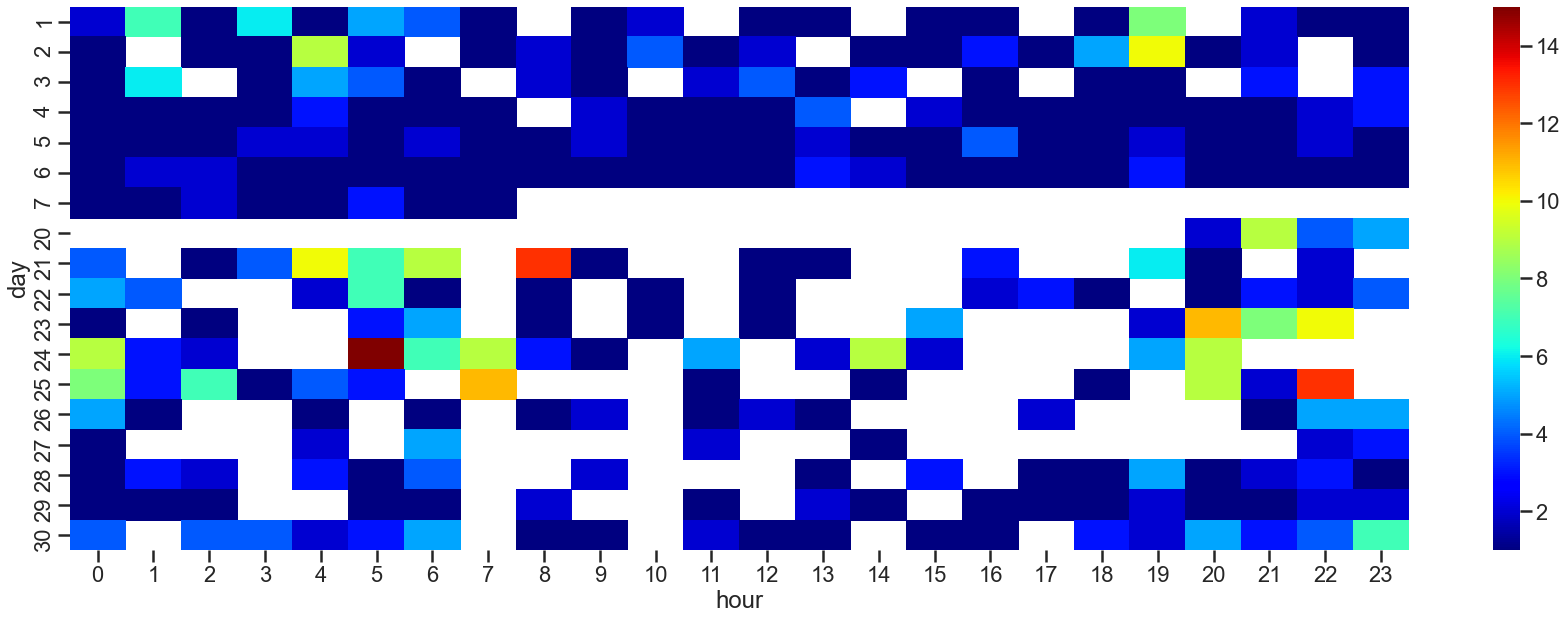

VDM_05_etoh


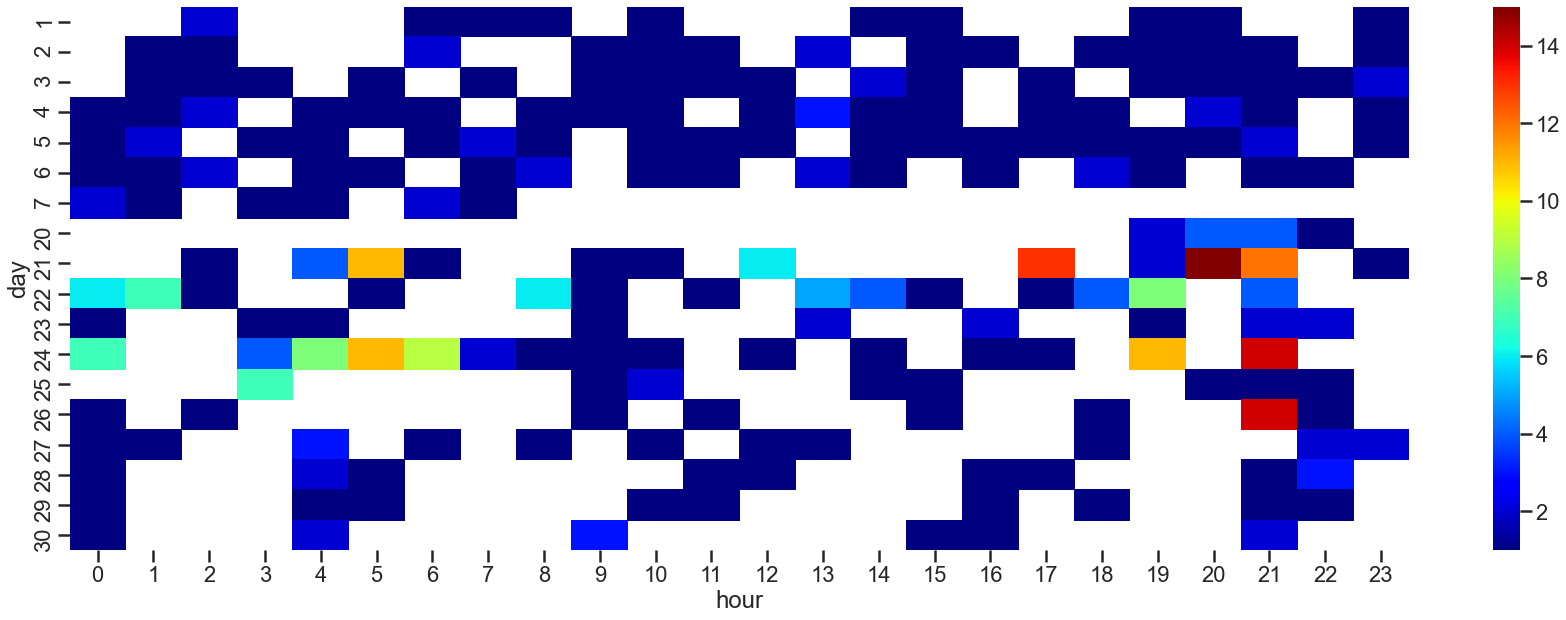

VDM_20_etoh


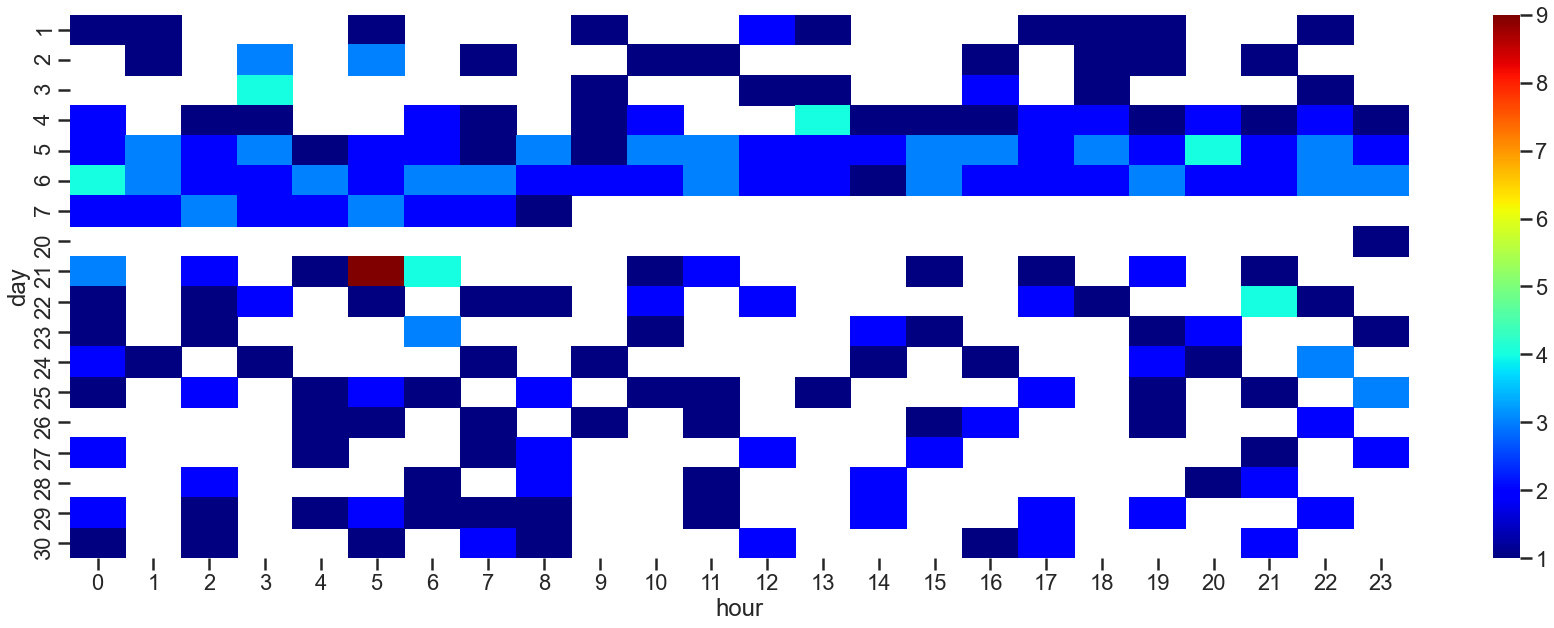

VDM_H20


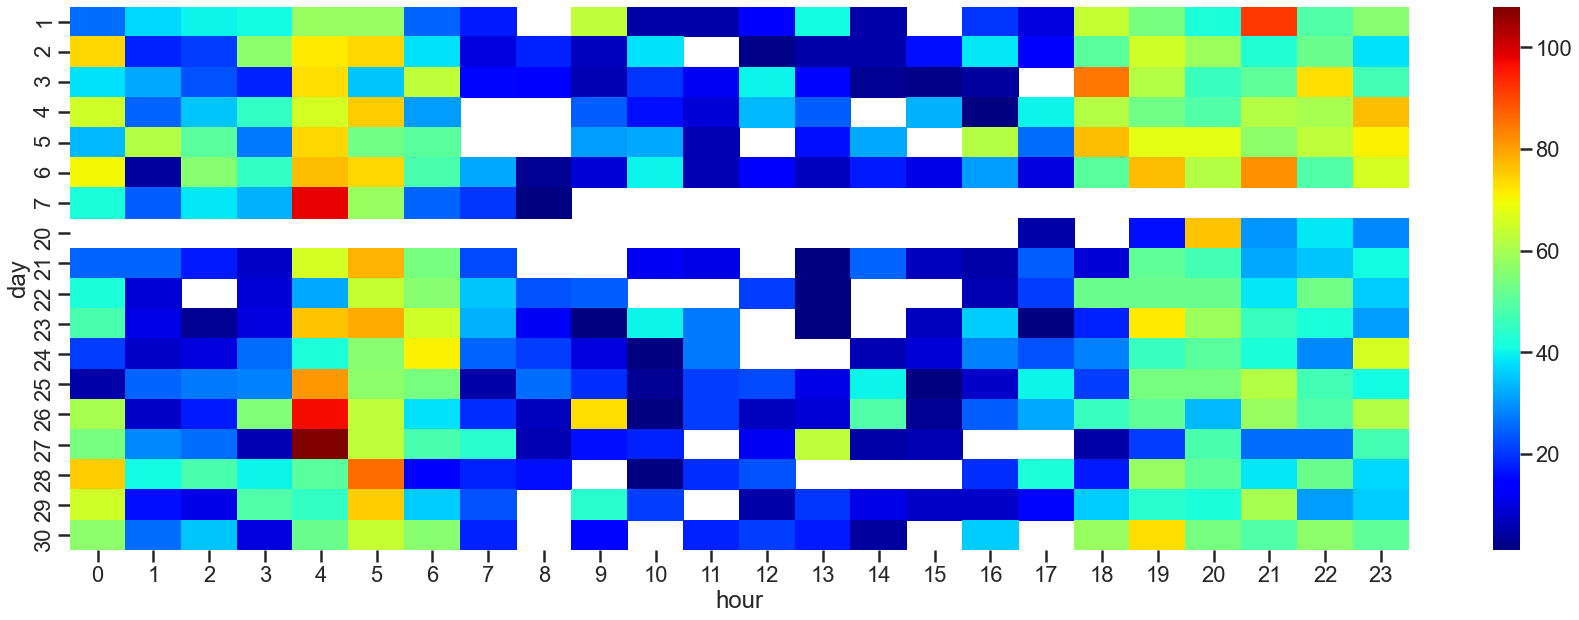

In [17]:
for variable in data_VDM_tidy_intake['variable'].unique():
    print(variable)
    #select variable
    data_int = data_VDM_tidy_intake[(data_VDM_tidy_intake['variable'] == variable)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['day', 'hour'])['value'].count().reset_index()
    #viz
    groupby = groupby.pivot("day", 'hour', "value")
    plt.figure(figsize=(30,10))
    ax = sns.heatmap(groupby, cmap="jet")
    plt.show()

### Filter RFID data by VDM times

In [18]:
data_VDM_tidy_intake = data_VDM_tidy_intake.sort_values(['date', 'time']).reset_index(drop=True)
data_VDM_tidy_intake.head()

,Cage,Cohort,TP,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg
0,1,r1,3m,201120,11/20/20 17:25:56,VDM_H20,0.027,2020-11-20 17:25:56,1.605893e+09,2020-11-20,20,17:25:56,17,25,light
1,1,r1,3m,201120,11/20/20 17:25:57,VDM_H20,0.027,2020-11-20 17:25:57,1.605893e+09,2020-11-20,20,17:25:57,17,25,light
2,1,r1,3m,201120,11/20/20 17:49:13,VDM_H20,0.027,2020-11-20 17:49:13,1.605895e+09,2020-11-20,20,17:49:13,17,49,light
3,1,r1,3m,201120,11/20/20 17:49:15,VDM_H20,0.027,2020-11-20 17:49:15,1.605895e+09,2020-11-20,20,17:49:15,17,49,light
4,1,r1,3m,201120,11/20/20 17:49:17,VDM_H20,0.027,2020-11-20 17:49:17,1.605895e+09,2020-11-20,20,17:49:17,17,49,light


In [19]:
data_RFID_final= data_RFID_final.sort_values(['date', 'start_time']).reset_index(drop=True)
data_RFID_final.head()

,Round,Cage,Animal,Injury,Unique,IdRFID,weight_pre,weight_post,weight_diff,unitLabel_drink,eventDuration,date,day,start_time,end_time,ld_seg,hour,min,day_count,hour_count,min_count
0,1,1,999,sham,sham_r1_3,041A555DFF,32.2,32.9,1.021739,RFID_20,4.447,2020-11-20,20,15:21:51,15:21:55,light,15,21,1,15,861
1,1,1,998,sham,sham_r1_2,041A55594C,39.3,41.0,1.043257,RFID_05,3.833,2020-11-20,20,15:21:53,15:21:56,light,15,21,1,15,861
2,1,2,1027,blast,blast_r1_1,041A555768,39.9,38.5,0.964912,RFID_05,0.616,2020-11-20,20,15:21:59,15:21:59,light,15,21,1,15,861
3,1,1,997,sham,sham_r1_1,041A555A78,33.8,33.3,0.985207,RFID_05,13.198,2020-11-20,20,15:22:08,15:22:21,light,15,22,1,15,862
4,1,2,1027,blast,blast_r1_1,041A555768,39.9,38.5,0.964912,RFID_10,5.315,2020-11-20,20,15:22:19,15:22:24,light,15,22,1,15,862


In [20]:
data_comb= data_VDM_tidy_intake
RFID_data = data_RFID_final

VDM_RFID_mapping = {'VDM_10_etoh': 'RFID_10',
                   'VDM_05_etoh': 'RFID_05',
                   'VDM_20_etoh': 'RFID_20',
                   'VDM_H20': 'RFID_H20'}

RFID_eventDuration = []
RFID_assign_pre = []
RFID_time_pre = []
RFID_date_pre = []

RFID_assign_post = []
RFID_time_post = []
RFID_date_post = []

for index, row in data_comb.iterrows():

    #find RFID signal start time closest to VDM time before
    try:
        int_assign = RFID_data[(RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & 
                               (RFID_data['date'] <= row['date']) &
                               (RFID_data['start_time'] <= row['time'])].iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_pre.append(int_assign['IdRFID'])
        RFID_time_pre.append(int_assign['start_time'])
        RFID_date_pre.append(int_assign['date'])
        
    except:
        print(index, 'pre')
        RFID_eventDuration.append(np.nan)
        RFID_assign_pre.append(np.nan)
        RFID_time_pre.append(np.nan)
        RFID_date_pre.append(np.nan)
        
    #find RFID signal start time closest to VDM time after 
    try:
        int_assign = RFID_data[(RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & 
                               (RFID_data['date'] >= row['date']) &
                               (RFID_data['start_time'] >= row['time'])].iloc[0]
    
        RFID_assign_post.append(int_assign['IdRFID'])
        RFID_time_post.append(int_assign['start_time'])
        RFID_date_post.append(int_assign['date'])
        
    except:
        print(index, 'post')
        RFID_assign_post.append(np.nan)
        RFID_time_post.append(np.nan)
        RFID_date_post.append(np.nan)

data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_pre'] = RFID_assign_pre
data_comb['RFID_assign_post'] = RFID_assign_post
data_comb['RFID_time_pre'] = RFID_time_pre
data_comb['RFID_time_post'] = RFID_time_post
data_comb['RFID_date_pre'] = RFID_date_pre
data_comb['RFID_date_post'] = RFID_date_post

print(data_comb.shape)
data_comb.head()

227 pre
228 pre
229 pre
230 pre
231 pre
232 pre
233 pre
234 pre
235 pre
236 pre
5834 pre
5835 pre
5836 pre
7386 pre
7387 pre
7388 pre
7389 pre
7390 pre
7391 pre
14305 post
14307 post
14324 post
14325 post
14326 post
14327 post
14328 post
14329 post
14330 post
(14331, 22)


,Cage,Cohort,TP,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post
0,1,r1,3m,201120,11/20/20 17:25:56,VDM_H20,0.027,2020-11-20 17:25:56,1.605893e+09,2020-11-20,20,17:25:56,17,25,light,19.508,041A555A78,041A555A78,17:25:47,17:26:08,2020-11-20,2020-11-20
1,1,r1,3m,201120,11/20/20 17:25:57,VDM_H20,0.027,2020-11-20 17:25:57,1.605893e+09,2020-11-20,20,17:25:57,17,25,light,19.508,041A555A78,041A555A78,17:25:47,17:26:08,2020-11-20,2020-11-20
2,1,r1,3m,201120,11/20/20 17:49:13,VDM_H20,0.027,2020-11-20 17:49:13,1.605895e+09,2020-11-20,20,17:49:13,17,49,light,37.012,041A555A78,041A555A78,17:49:09,17:49:48,2020-11-20,2020-11-20
3,1,r1,3m,201120,11/20/20 17:49:15,VDM_H20,0.027,2020-11-20 17:49:15,1.605895e+09,2020-11-20,20,17:49:15,17,49,light,37.012,041A555A78,041A555A78,17:49:09,17:49:48,2020-11-20,2020-11-20
4,1,r1,3m,201120,11/20/20 17:49:17,VDM_H20,0.027,2020-11-20 17:49:17,1.605895e+09,2020-11-20,20,17:49:17,17,49,light,37.012,041A555A78,041A555A78,17:49:09,17:49:48,2020-11-20,2020-11-20


In [21]:
#compute time differences and whether they are within the duration of the RFID

data_comb['time_diff_pre'] = (pd.to_datetime(data_comb['time']) - pd.to_datetime(data_comb['RFID_time_pre']))
data_comb['time_diff_pre'] = [x.total_seconds() for x in data_comb['time_diff_pre']]

data_comb['time_diff_post'] = (pd.to_datetime(data_comb['RFID_time_post']) - pd.to_datetime(data_comb['time']))
data_comb['time_diff_post'] = [x.total_seconds() for x in data_comb['time_diff_post']]

time_bad = []
for index, row in data_comb.iterrows():
    if (row['time_diff_pre'] > row['RFID_eventDuration']):
        #print(index, 'greater')
        time_bad.append(row['time_diff_pre'] - row['RFID_eventDuration'])
    elif (row['time_diff_pre'] <= row['RFID_eventDuration']):
        #print(index, 'less')
        time_bad.append(0)
    else:
        time_bad.append(np.nan)

data_comb['time_bad'] = time_bad

(14331, 25)


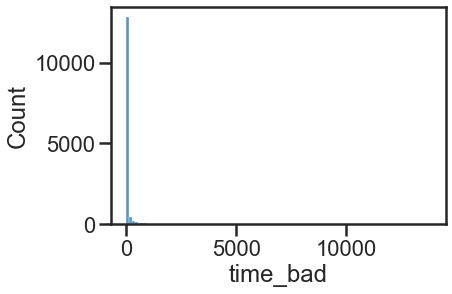

In [22]:
print(data_comb.shape)
sns.histplot(data_comb['time_bad'], bins=100)
plt.show()

#### Add metadata

In [ ]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_3m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_pre', sort=False)

print(data_comb.shape)
data_comb.head()

#### Add day, hour, and min counts

In [ ]:
#split by round to get specific dates
data_comb_r1 = data_comb[data_comb['Round'] == 1]
data_comb_r2 = data_comb[data_comb['Round'] == 2]

#column of running day count
dat_map = dict(zip(data_comb_r1['date'].unique(), np.arange(1,len(data_comb_r1['date'].unique())+1)))
data_comb_r1['day_count'] = data_comb_r1['date'].map(dat_map)
#column of running hour and minute count
data_comb_r1['hour_count'] = (data_comb_r1['day_count']*24) + data_comb_r1['hour'] - 24
data_comb_r1['min_count'] = (data_comb_r1['hour_count']*60) + data_comb_r1['min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r2['date'].unique(), np.arange(1,len(data_comb_r2['date'].unique())+1)))
data_comb_r2['day_count'] = data_comb_r2['date'].map(dat_map)
#column of running hour and minute count
data_comb_r2['hour_count'] = (data_comb_r2['day_count']*24) + data_comb_r2['hour'] - 24
data_comb_r2['min_count'] = (data_comb_r2['hour_count']*60) + data_comb_r2['min'] - 60

#combine back together
data_comb_final = pd.concat([data_comb_r1, data_comb_r2], axis=0)
print(data_comb_final.shape)
data_comb_final.head()

#### Compute intake per body weight

In [ ]:
data_comb_final['drink_bw'] = data_comb_final['value'] / (data_comb_final['weight_pre'] /1000)

### Export data

In [ ]:
data_VDM_tidy_intake.to_csv('data_VDM_tidy_intake.csv')
data_RFID_final.to_csv('data_RFID_final.csv')
data_comb_final.to_csv('data_comb_final.csv')

### Viz

In [ ]:
data_int = data_comb_final.groupby(['IdRFID', 'variable', 'Injury', 'ld_seg', 'hour_count']).sum().reset_index()

sns.catplot(x='hour_count', y='value', data=data_int, kind='bar', hue='Injury', 
            size=5, ci=68, aspect=5, 
            sharex=True, sharey=False,
            col='variable', col_wrap=1)

#### heat map

In [ ]:
for variable in data_comb_final['variable'].unique():
    print(variable)
    #select variable
    data_int = data_comb_final[(data_comb_final['variable'] == variable) & (data_comb_final['day_count'] < 8) & (data_comb_final['time_bad'] < 5)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['Injury', 'day_count'])['drink_bw'].sum().reset_index()
    #viz
    groupby = groupby.pivot("Injury", "day_count", "drink_bw")
    plt.figure(figsize=(30,10))
    ax = sns.heatmap(groupby, cmap="jet")
    plt.show()

#### rasters

In [ ]:
# Set the random seed for data generation

np.random.seed(39)


# Set different colors for each neuron

# Set different colors for each neuron

colorCodes = np.array([[0, 0, 0],

                        [1, 0, 0],

                        [0, 1, 0],

                        [0, 0, 1],

                        [0, .5, 1],

                        [1, 0, 1],

                        [0, 1, 1],

                        [.5, 0, 0]])

                       

# Set spike colors for each neuron

lineSize = [0.5, 0.3, 0.5, 0.3, 0.5, 0.3, 0.5, 0.3]                               

param = 'min_count'

data = data_VDM_tidy_intake

data_1 = data_comb_final[(data_comb_final['IdRFID'] == '041A555A78')]
data_2 = data_comb_final[(data_comb_final['IdRFID'] == '041A5554AF')]

data_V11 = data_1[data_1['variable'] == 'VDM_10'][param].values
data_V21 = data_1[data_1['variable'] == 'VDM_05'][param].values
data_V31 = data_1[data_1['variable'] == 'VDM_20'][param].values
data_V41 = data_1[data_1['variable'] == 'VDM_H20'][param].values

data_V12 = data_2[data_2['variable'] == 'VDM_10'][param].values
data_V22 = data_2[data_2['variable'] == 'VDM_05'][param].values
data_V32 = data_2[data_2['variable'] == 'VDM_20'][param].values
data_V42 = data_2[data_2['variable'] == 'VDM_H20'][param].values

data_array = np.array([data_V11, data_V12, data_V21, data_V22, data_V31, data_V32, data_V41, data_V42])

# Draw a spike raster plot
plt.figure(figsize=(30,10))
plt.eventplot(data_array, color=colorCodes, linelengths = lineSize)  
plt.xlabel('Time')
plt.ylabel('Device')

#plt.xticks(data_array, data_VDM_tidy_intake['datetime'], color='orange', rotation=45, )

plt.show()